## Setup Python statistical environment

In [1]:
import pandas as pd
#import pandasql as psql
import numpy as np
#import ggplot as gg
import math
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## Read in the input dataset

In [3]:
df = pd.read_csv("turnstile_weather_v2.csv")

## Obtain some number statistics for the input dataset

In [4]:
df.UNIT.unique().size # Obtain the number of turnstile points

240

In [5]:
df.shape # Obtain the number of dataframe records and columns

(42649, 27)

In [6]:
df.station.unique().shape # Number of NYC subway stations

(207,)

In [7]:
df.UNIT.unique().shape # Number of telemetry UNITS in the NYC subway stations

(240,)

In [8]:
stations = df.groupby('station')

In [9]:
units = df.groupby('UNIT')

In [10]:
units_in_station = stations.UNIT.unique() # Find the UNITs in each section

In [11]:
units_in_station

station
1 AVE                          [R248]
103 ST-CORONA                  [R208]
104 ST                         [R007]
110 ST                         [R181]
110 ST-CPN                     [R323]
111 ST                   [R008, R310]
121 ST                         [R009]
125 ST                   [R034, R102]
135 ST                         [R207]
138 ST-GR CONC                 [R307]
14 ST                          [R105]
145 ST             [R101, R273, R344]
148 ST-LENOX                   [R345]
149 ST-3 AVE                   [R053]
149 ST-GR CONC                 [R205]
167 ST                   [R104, R221]
168 ST-BROADWAY                [R035]
169 ST                         [R115]
170 ST                         [R243]
174-175 ST                     [R253]
175 ST                         [R126]
176 ST                         [R309]
18 AVE                   [R242, R372]
18 ST                          [R321]
181 ST                         [R260]
182-183 ST                     [R237]
183 

In [71]:
multiunit_stations = units_in_station[units_in_station.map(len) > 1]

In [72]:
multiunit_stations.shape

(28,)

In [73]:
multiunit_stations # Which are the subway stations containing more than 1 UNIT?

station
111 ST                   [R008, R310]
125 ST                   [R034, R102]
145 ST             [R101, R273, R344]
167 ST                   [R104, R221]
18 AVE                   [R242, R372]
23 ST-6 AVE              [R203, R453]
25 ST                    [R278, R455]
34 ST-HERALD SQ          [R022, R023]
34 ST-PENN STA     [R012, R013, R031]
42 ST-TIMES SQ           [R032, R033]
50 ST              [R116, R188, R234]
86 ST              [R179, R186, R215]
ATLANTIC AVE             [R057, R348]
BOWLING GREEN            [R041, R042]
CHAMBERS ST              [R030, R044]
CHURCH AVE               [R098, R204]
DEKALB AVE               [R099, R236]
FORDHAM ROAD             [R112, R119]
GRAND ST                 [R240, R250]
HOYT ST                  [R225, R456]
JAY ST-METROTEC          [R089, R127]
LEXINGTON AVE      [R050, R051, R319]
LEXINGTON-53 ST          [R016, R017]
NOSTRAND AVE             [R061, R198]
PROSPECT AVE             [R246, R454]
RECTOR ST                [R227, R304]
SPRI

In [69]:
(units.DATEn.nunique() == 31).all() # Does every UNIT has data for all 31 days?

False

In [68]:
units.DATEn.unique()[units.DATEn.nunique() != 31] # Whicha are the UNITs with less than 31-days worth of data?

UNIT
R228    [05-01-11, 05-02-11, 05-03-11, 05-04-11, 05-05...
R253    [05-01-11, 05-02-11, 05-03-11, 05-04-11, 05-05...
R260    [05-01-11, 05-02-11, 05-03-11, 05-04-11, 05-05...
R273    [05-01-11, 05-02-11, 05-03-11, 05-04-11, 05-05...
R295    [05-01-11, 05-02-11, 05-03-11, 05-04-11, 05-05...
R356    [05-01-11, 05-02-11, 05-03-11, 05-04-11, 05-05...
R453    [05-01-11, 05-02-11, 05-03-11, 05-04-11, 05-05...
R459    [05-14-11, 05-15-11, 05-16-11, 05-17-11, 05-18...
Name: DATEn, dtype: object

In [67]:
(units.TIMEn.nunique() == 6).all() # Does every UNIT has data for all 6 timepoints?

True

In [18]:
df.apply(pd.isnull,axis=0).any() # Checking input dataset for missing/NaN values

UNIT               False
DATEn              False
TIMEn              False
ENTRIESn           False
EXITSn             False
ENTRIESn_hourly    False
EXITSn_hourly      False
datetime           False
hour               False
day_week           False
weekday            False
station            False
latitude           False
longitude          False
conds              False
fog                False
precipi            False
pressurei          False
rain               False
tempi              False
wspdi              False
meanprecipi        False
meanpressurei      False
meantempi          False
meanwspdi          False
weather_lat        False
weather_lon        False
dtype: bool

In [19]:
df.describe().T # Printing the data ranges for each column

,count,mean,std,min,25%,50%,75%,max
ENTRIESn,42649,28124856.263242,30436070.292291,0.000000,10397624.000000,18183888.000000,32630491.000000,2.357746e+08
EXITSn,42649,19869932.521607,20289857.656428,0.000000,7613712.000000,13316091.000000,23937714.000000,1.493782e+08
ENTRIESn_hourly,42649,1886.589955,2952.385585,0.000000,274.000000,905.000000,2255.000000,3.281400e+04
EXITSn_hourly,42649,1361.487866,2183.845409,0.000000,237.000000,664.000000,1537.000000,3.482800e+04
hour,42649,10.046754,6.938928,0.000000,4.000000,12.000000,16.000000,2.000000e+01
day_week,42649,2.905719,2.079231,0.000000,1.000000,3.000000,5.000000,6.000000e+00
weekday,42649,0.714436,0.451688,0.000000,0.000000,1.000000,1.000000,1.000000e+00
latitude,42649,40.724647,0.071650,40.576152,40.677107,40.717241,40.759123,4.088918e+01
longitude,42649,-73.940364,0.059713,-74.073622,-73.987342,-73.953459,-73.907733,-7.375538e+01
fog,42649,0.009824,0.098631,0.000000,0.000000,0.000000,0.000000,1.000000e+00


## Plotting the UNITs/stations on a map

### Determining whether it's the UNITs or the stations that have unique coordinates

In [65]:
(units.latitude.nunique() > 1).any()  # Are there any UNITs having multiple geographical coordinates?

False

In [66]:
(stations.latitude.nunique() > 1).any() # Are there any stations having multiple geographical coordinates?

True

Obviously, it is the UNITs that have unique coordinates (latitude/longitude tuple).

### Determining the relationship between UNITs and Met Stations

In [64]:
# Are there any units associated with more than one meteorological station?
((units.weather_lat.nunique() > 1) | (units.weather_lon.nunique() > 1)).any()

False

We also see, that each UNIT is serviced by only one meteorological station during the whole data collection period.

### Plotting the UNITs on a map

We create a new DataFrame that will contain the coordinates of the UNITs

In [23]:
unit_coords = pd.DataFrame({'latitude':units.latitude.unique().map(np.squeeze), 
                            'longitude':units.longitude.unique().map(np.squeeze), 
                            'weather_lat':units.weather_lat.unique().map(np.squeeze), 
                            'weather_lon':units.weather_lon.unique().map(np.squeeze)})

In [24]:
unit_coords.head()

,latitude,longitude,weather_lat,weather_lon
UNIT,,,,
R003,40.689945,-73.872564,40.700348,-73.887177
R004,40.691320,-73.867135,40.679413,-73.851105
R005,40.692304,-73.860151,40.679413,-73.851105
R006,40.693866,-73.851568,40.679413,-73.851105
R007,40.695184,-73.844326,40.679413,-73.851105


Here is a function that transforms the geographical coordinated into **Spherical Mercator** map coordinates. Spherical Mercator is the projection used by Google Maps, from which we will take a snapshot of NYC's map.

In [25]:
def WGS84toGoogleBing(lat, lon):
  x = lon * 20037508.34 / 180.0;
  y = math.log(math.tan((90.0 + lat) * math.pi / 360.0)) / (math.pi / 180.0);
  y = y * 20037508.34 / 180.0;
  return (x, y)

We add a new column with the Mercator-transformed points to the UNIT's coordinate DataFrame

In [26]:
unit_coords = unit_coords.assign(mercator_coords=unit_coords.apply(lambda row: WGS84toGoogleBing(row[0],row[1]), axis=1))

Here we read the base map screenshot, as obtained from http://www.maptiler.org/photoshop-google-maps-overlay-tiles/

In [27]:
google_nyc_map = plt.imread("./staticmap.png")
google_nyc_map.shape

(1280, 1280, 3)

We define a function that maps the Mercator-projected points onto the Google Map screenshot

In [28]:
def proj2pic(x, y):
    # The screenshot map coordinates are obtained from Maptiler.org
    map_coords = {'xmin':-8251109.673785778, 'ymin':4947908.707295347, 
                  'xmax':-8202189.975683266, 'ymax': 4996828.40539786}
    xsize, ysize = google_nyc_map.shape[0], google_nyc_map.shape[1]
    xscale = map_coords['xmax'] - map_coords['xmin']
    yscale = map_coords['ymax'] - map_coords['ymin']
    
    picx = xsize * (x - map_coords['xmin']) / xscale
    picy = ysize - (ysize * (y - map_coords['ymin']) / yscale)
    
    return (picx, picy)

We add two new columns to the coordinates DataFrame, containing the final picture coords.

In [29]:
unit_coords = unit_coords.assign(pic_coords = unit_coords.apply(lambda row: proj2pic(row[4][0],row[4][1]), axis=1))

In [30]:
unit_coords.head() # This shows the final DataFrame with all necessary coordinates for mapping each UNIT

,latitude,longitude,weather_lat,weather_lon,mercator_coords,pic_coords
UNIT,,,,,,
R003,40.689945,-73.872564,40.700348,-73.887177,"(-8223456.20693, 4966715.630427459)","(723.562060885, 787.9106670147889)"
R004,40.691320,-73.867135,40.679413,-73.851105,"(-8222851.85341, 4966917.498055205)","(739.375169505, 782.6287341015325)"
R005,40.692304,-73.860151,40.679413,-73.851105,"(-8222074.39809, 4967061.964427493)","(759.717543902, 778.8487239276977)"
R006,40.693866,-73.851568,40.679413,-73.851105,"(-8221118.9429, 4967291.2944933735)","(784.717343366, 772.8482272829224)"
R007,40.695184,-73.844326,40.679413,-73.851105,"(-8220312.76715, 4967484.805094864)","(805.811197229, 767.7849587118635)"


Now we can overlay the UNITs on top of the NYC base map

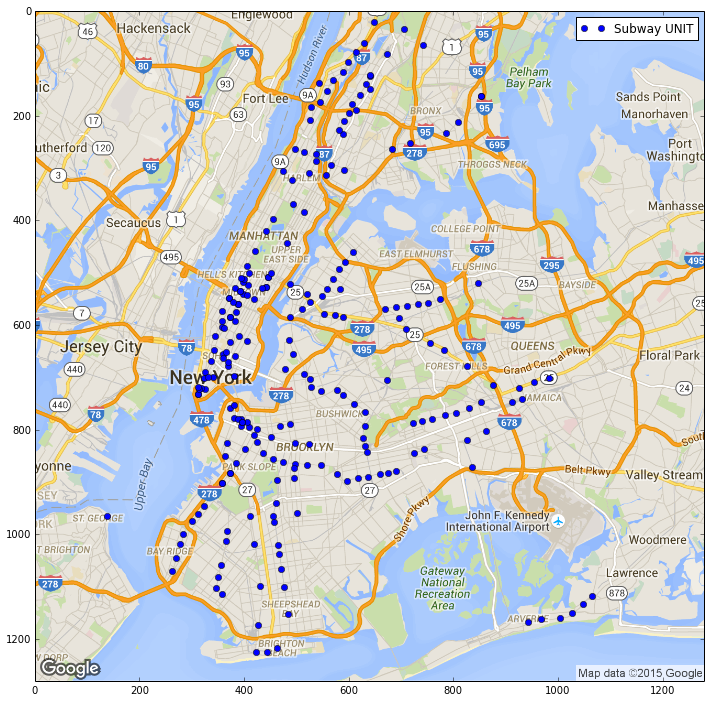

In [31]:
plt.rcParams['figure.figsize'] = (12.0, 12.0)
plt.imshow(google_nyc_map)
xx, yy = zip(*unit_coords.pic_coords.values)
plt.plot(xx, yy, "bo", label = "Subway UNIT")
plt.axis([0,google_nyc_map.shape[0],google_nyc_map.shape[1],0])
plt.legend()

plt.savefig("images/map_stations.png", dpi=200, bbox_inches='tight')

# Meteorological Stations

Next, we would like to map and explore a bit the meteo stations that service the subway UNITs.

First we create a DataFrame containing the coordinates of all meteo stations - this will allow us to plot them on a map.

In [32]:
metstat = df[['weather_lat','weather_lon']].drop_duplicates()

In [33]:
metstat.shape # Find the number of meteorological stations

(37, 2)

In [34]:
# Add columns containg Mercator projection and Picture coordinates
metstat = metstat.assign(mercator_coords = metstat.apply(lambda row: WGS84toGoogleBing(row[0],row[1]), axis=1))
metstat = metstat.assign(pic_coords = metstat.apply(lambda row: proj2pic(row[2][0],row[2][1]), axis=1))

In [35]:
# Add a column containing a unique color coding for each meteo station
metstat = metstat.set_index(np.arange(0, metstat.shape[0])) # Renumber the index for this DataFrame as 0:N-1
metstat = metstat.assign(color = metstat.index/metstat.shape[0])

In [36]:
metstat.head()

,weather_lat,weather_lon,mercator_coords,pic_coords,color
0,40.700348,-73.887177,"(-8225082.91865, 4968243.02767558)","(680.998613424, 747.9458153614136)",0.000000
1,40.679413,-73.851105,"(-8221067.40198, 4965169.535928402)","(786.06592861, 828.3647383920505)",0.027027
2,40.718239,-73.839005,"(-8219720.43614, 4970870.39180045)","(821.309733049, 679.1999683861084)",0.054054
3,40.752632,-73.979225,"(-8235329.65513, 4975923.124158808)","(412.889381106, 546.9935634090141)",0.081081
4,40.742073,-73.998711,"(-8237498.82673, 4974371.606156858)","(356.132292403, 587.5895425243147)",0.108108


## Map of the meteo stations with Voronoi tesselation

The code below creates a map of the meteo stations and performs a Voronoi tesselation of the meteo stations' mesh.
The idea is to calculate and visualize the **region of responsability** for each meteo station. Theoretically, each meteo station should service the subway UNITs located in its region of responsability.

Then the reality is shown, by plotting each subway UNIT on the map with the same color as its real servicing meteo station, as taken from the initial dataset.

It the color of the UNIT coincides with the color of the Voronoi region in which it is located, this means that the computed "responsability" region is the same as the one in reality.

In [37]:
# Here we calculate the Voronoi tesselation of the meteo station mesh
from scipy.spatial import Voronoi, voronoi_plot_2d
vor_points = np.array([np.array(i) for i in metstat['pic_coords'].values])
vor = Voronoi(vor_points)

In [38]:
# Note: The code below is taken from http://stackoverflow.com/questions/20515554/colorize-voronoi-diagram
def voronoi_finite_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite voronoi regions in a 2D diagram to finite
    regions.

    Parameters
    ----------
    vor : Voronoi
        Input diagram
    radius : float, optional
        Distance to 'points at infinity'.

    Returns
    -------
    regions : list of tuples
        Indices of vertices in each revised Voronoi regions.
    vertices : list of tuples
        Coordinates for revised Voronoi vertices. Same as coordinates
        of input vertices, with 'points at infinity' appended to the
        end.

    """

    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()*2

    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all([v >= 0 for v in vertices]):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)

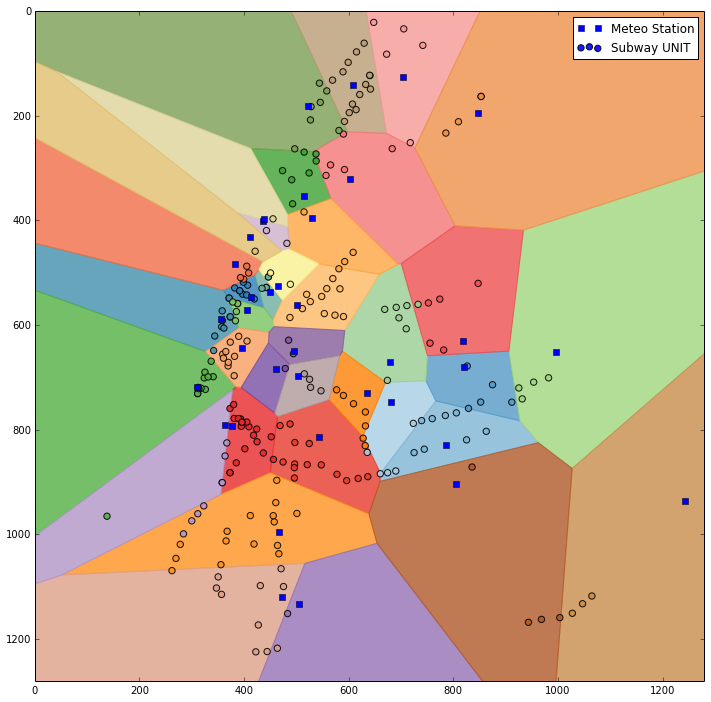

In [39]:
import matplotlib.cm as cm

regions, vertices = voronoi_finite_polygons_2d(vor)

# Draw and colorize the regions of the Voronoi tesselation
col = 0
clrmap = cm.get_cmap("Paired", lut = metstat.shape[0])
for region in regions:
    col = col + 1
    polygon = vertices[region]
    plt.fill(*zip(*polygon), alpha=0.8, color=clrmap(metstat.color[col-1]))

plt.plot(vor_points[:,0], vor_points[:,1], 'bs', label="Meteo Station")
plt.gca().invert_yaxis()

# Plot the NYC base map
#plt.imshow(google_nyc_map, alpha=0.6)

# Plot the UNITs
units_with_color = pd.merge(unit_coords, metstat, on = ['weather_lat','weather_lon'], how="left")
units_with_color.set_index(unit_coords.index)
units_color = units_with_color.color
plt.scatter(xx, yy, label = "Subway UNIT", cmap=clrmap, s = 40, c=units_color, alpha=0.9, zorder=2)

plt.axis([0, google_nyc_map.shape[0], google_nyc_map.shape[1], 0])
plt.legend()

plt.savefig("images/meteo_voronoi.png", dpi=200, bbox_inches='tight')

Conclusion: The map above clearly shows that a Voronoi tesselation provides a pretty accurate calculation of the "responsibility" region for each meteo station. This means that most of the UNITs are really serviced by the meteo stations predicted by the tesselation. This is visualized by most UNITs having the same color as the Voronoi region where they are located.

# Meteo Conditions

First we will determin **how big** is the area of the NYC subway. For this we will use the Haversine formula of geodesics to calculate the N-S and E-W distance between the subway UNITs that have extreme latitudes and longitudes respectively. 

In [40]:
# The function below finds the distance in meters between two geographical points
def HaversineDistance(lon1, lon2, lat1, lat2):
    R = 6371000 # Earth radius in metres
    φ1 = math.radians(lat1)
    φ2 = math.radians(lat2)
    Δφ = math.radians(lat2-lat1)
    Δλ = math.radians(lon2-lon1)

    a = math.sin(Δφ/2) * math.sin(Δφ/2) + \
        math.cos(φ1) * math.cos(φ2) * \
        math.sin(Δλ/2) * math.sin(Δλ/2)

    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))

    d = R * c
    
    return d

In [41]:
extents_NS = HaversineDistance(0,0,df.latitude.min(), df.latitude.max()) / 1000 # North-South subway area size in km

In [42]:
extents_EW = HaversineDistance(df.longitude.min(), df.longitude.max(),0,0) / 1000 # East-West subway area size in km

In [43]:
extents_NS, extents_EW # Area extents of NYC subway, km 

(34.80768147232585, 35.386562260438346)

We then proceed to determe how **homogenous** are the climate conditions over the whole NYC subway area. Since this area is pretty big (approx 35 x 35 km), we can expect to see different weather conditions or **micro-weather** at different subway stations at the same point of time. We're especially interested to see if there are moments when some stations receive rain, while others do not.

In [44]:
dates_group = df.groupby("datetime")

In [63]:
# Determine the times when we've had both "rainy" and "non-rainy" stations
dates_group.rain.nunique()[dates_group.rain.nunique() > 1]

datetime
2011-05-04 00:00:00    2
2011-05-04 04:00:00    2
2011-05-04 16:00:00    2
2011-05-04 20:00:00    2
2011-05-14 00:00:00    2
2011-05-14 04:00:00    2
2011-05-14 08:00:00    2
2011-05-14 12:00:00    2
2011-05-14 16:00:00    2
2011-05-14 20:00:00    2
2011-05-15 16:00:00    2
2011-05-15 20:00:00    2
2011-05-16 00:00:00    2
2011-05-16 04:00:00    2
2011-05-16 08:00:00    2
2011-05-16 12:00:00    2
2011-05-16 16:00:00    2
2011-05-16 20:00:00    2
2011-05-18 00:00:00    2
2011-05-18 04:00:00    2
2011-05-18 12:00:00    2
2011-05-19 00:00:00    2
2011-05-19 04:00:00    2
2011-05-19 08:00:00    2
2011-05-19 12:00:00    2
2011-05-19 16:00:00    2
2011-05-19 20:00:00    2
2011-05-20 00:00:00    2
2011-05-20 04:00:00    2
2011-05-20 08:00:00    2
2011-05-20 20:00:00    2
2011-05-23 00:00:00    2
2011-05-23 04:00:00    2
2011-05-23 08:00:00    2
2011-05-23 12:00:00    2
2011-05-23 16:00:00    2
2011-05-23 20:00:00    2
2011-05-30 00:00:00    2
2011-05-30 04:00:00    2
2011-05-30 08:00

In [46]:
# The same for "foggy" and "non-foggy" stations
dates_group.fog.unique().map(len)[dates_group.fog.unique().map(len) > 1]

datetime
2011-05-15 08:00:00    2
2011-05-15 12:00:00    2
2011-05-18 16:00:00    2
2011-05-19 20:00:00    2
2011-05-24 04:00:00    2
2011-05-24 08:00:00    2
Name: fog, dtype: int64

The important conclusion is that we **cannot always talk** about completely "rainy" or "non-rainy" situation for the whole metro. 

We will ???????????

In [47]:
units_hour_rain_group = df.groupby(["UNIT","hour","rain"])

entries_uhr_meaned = units_hour_rain_group.ENTRIESn_hourly.mean()

entries_rain_weekday = entries_uhr_meaned.xs((1,1),level=('rain','weekday'))
entries_rain_weekend = entries_uhr_meaned.xs((1,0),level=('rain','weekday'))
entries_norain_weekday = entries_uhr_meaned.xs((0,1),level=('rain','weekday'))
entries_norain_weekend = entries_uhr_meaned.xs((0,0),level=('rain','weekday'))

In [48]:
units_wkday_rain_group = df.groupby(["UNIT","weekday","rain"])

entries_uwr_meaned = units_wkday_rain_group.ENTRIESn_hourly.mean()

entries_rain_weekday = entries_uwr_meaned.xs((1,1),level=('rain','weekday'))
entries_rain_weekend = entries_uwr_meaned.xs((1,0),level=('rain','weekday'))
entries_norain_weekday = entries_uwr_meaned.xs((0,1),level=('rain','weekday'))
entries_norain_weekend = entries_uwr_meaned.xs((0,0),level=('rain','weekday'))

In [50]:
# Just to verify that the entries_XXXX dataframes have all the same size equal to the number of UNITs
entries_rain_weekday.size == entries_rain_weekday.size == entries_norain_weekday.size == entries_norain_weekend.size == units.ngroups

True

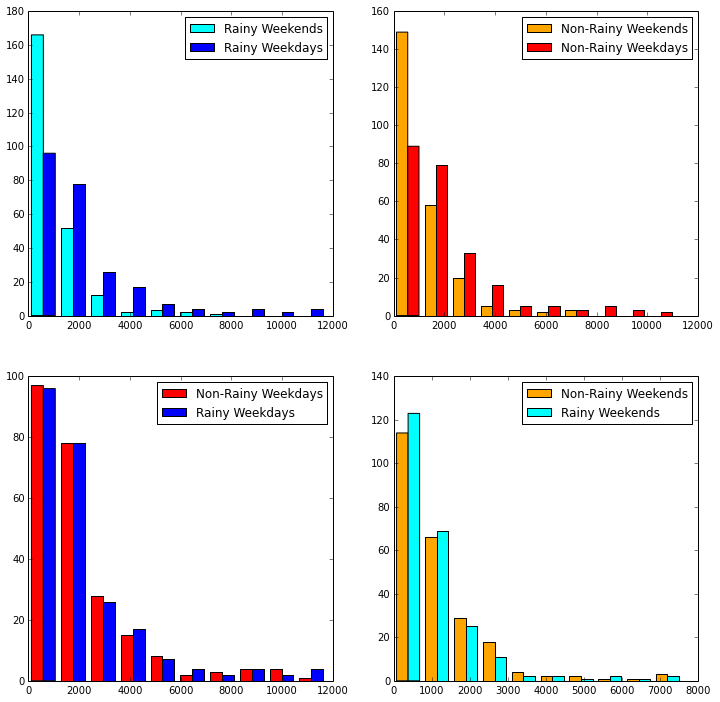

In [51]:
plt.subplot(2,2,1)
plt.hist((entries_rain_weekend,entries_rain_weekday), label=("Rainy Weekends","Rainy Weekdays"), color=('cyan','blue'))
plt.legend()

plt.subplot(2,2,2)
plt.hist((entries_norain_weekend,entries_norain_weekday), label=("Non-Rainy Weekends","Non-Rainy Weekdays"), color=('orange','red'))
plt.legend()

plt.subplot(2,2,3)
plt.hist((entries_norain_weekday,entries_rain_weekday), label=("Non-Rainy Weekdays", "Rainy Weekdays"), color=('red','blue') )
plt.legend()

plt.subplot(2,2,4)
plt.hist((entries_norain_weekend,entries_rain_weekend), label=("Non-Rainy Weekends", "Rainy Weekends"), color=('orange','cyan'))
plt.legend()

plt.savefig("images/rain_weekday_histo.png", dpi=200, bbox_inches='tight')

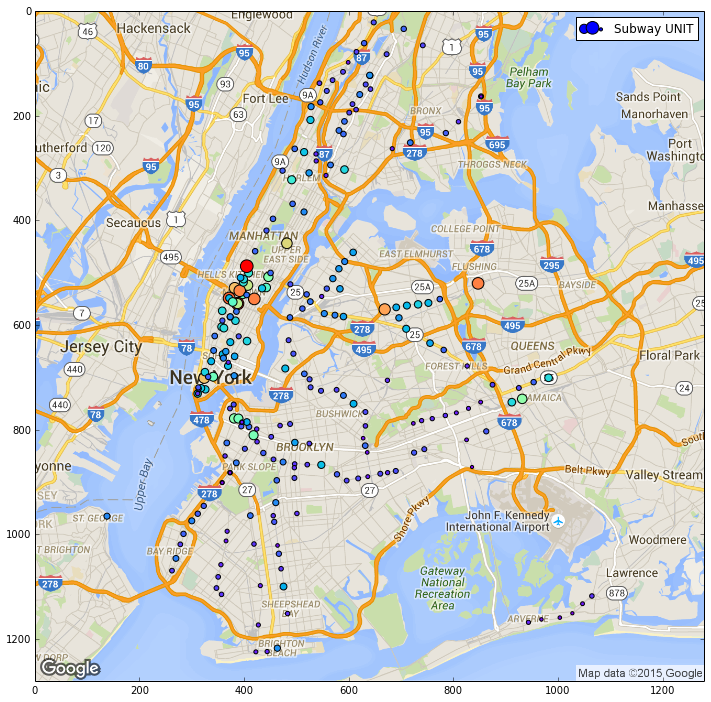

In [52]:
plt.rcParams['figure.figsize'] = (12.0, 12.0)
plt.imshow(google_nyc_map)
xx, yy = zip(*unit_coords.pic_coords.values)
min_mean_entry = units.ENTRIESn_hourly.mean().min()
max_mean_entry = units.ENTRIESn_hourly.mean().max()
circle_size = units.ENTRIESn_hourly.mean()/max_mean_entry * 150 + 10
cmap = cm.get_cmap("rainbow", lut=circle_size.size)
plt.scatter(xx, yy,  s=circle_size, c=circle_size/circle_size.max(), cmap=cmap, label = "Subway UNIT")
plt.axis([0,google_nyc_map.shape[0],google_nyc_map.shape[1],0])
plt.legend()

plt.savefig("images/map_stations_entry.png", dpi=200, bbox_inches='tight')

In [129]:
import statsmodels.api as sm
dummies = pd.get_dummies(df['conds'])
dummies.drop(["Rain","Partly Cloudy","Heavy Rain","Mist","Fog"], axis=1,inplace=True)
df_for_lr = df[["rain", "hour", "day_week", "weekday"]].copy()
df_for_lr["intercept"] = 1.0
df_for_lr = df_for_lr.join(dummies)

logit = sm.OLS(df["ENTRIESn_hourly"],df_for_lr)
result = logit.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:        ENTRIESn_hourly   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     486.8
Date:                Fre, 16 Okt 2015   Prob (F-statistic):               0.00
Time:                        06:22:10   Log-Likelihood:            -3.9877e+05
No. Observations:               42649   AIC:                         7.976e+05
Df Residuals:                   42637   BIC:                         7.977e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
rain               103.4855     38.742  

In [143]:
df.plot('scatter')

KeyError: 'scatter'

In [132]:
sm.Regre

'\n    Results class for for an OLS model.\n\n    Most of the methods and attributes are inherited from RegressionResults.\n    The special methods that are only available for OLS are:\n\n    - get_influence\n    - outlier_test\n    - el_test\n    - conf_int_el\n\n    See Also\n    --------\n    RegressionResults\n\n    '

In [120]:
 df[['conds','rain']][~(df.conds.str.contains('Rain')) & (df.rain==1)]

,conds,rain
16,Mostly Cloudy,1
17,Overcast,1
20,Overcast,1
21,Overcast,1
72,Mostly Cloudy,1
73,Overcast,1
74,Overcast,1
75,Overcast,1
77,Overcast,1
80,Overcast,1


In [118]:
~1

-2